# Assignment #3 - Reinforcement Learning

### <font color="red"> DUE: Mar 19 (Monday) 11:00 pm </font>  

## Kiran Korey

# I. Overview


The objective of this assignment is to learn Reinforcement Learning and to build RL Agent for solving Maze Problem and BlackJack problem.A Grid World Environment is created using the GridWorld class and grid.txt file. The BlackJack environment is created using the modified Open AI gym implementation of BlackJackEnv class. An agent is built and trained for both the environments using Q-Learning.

The Goal of the RL Agent for Maze problem would be to find the shortest path from the start point to the goal without hitting the Wall.
The Goal of the RL Agent for BlackJack problem would be to make decision whether to draw a card or not and to win the game.

# II. Problems 

## A. Maze Problem (Practice)


The maze problem is to train an agent to find an optimal path from a given start point to a predetermined goal state.The Maze also contains obstacles i.e. walls, the agent should be able to avoid hitting the wall in it's optimal path.The optimal path is found by training the agent for many iterations and calculating the net reward for each action for each state in the maze.
These calculated values are stored in Q-table, for the agent to reference when it is actually tested.The agent refers to this Q-Table to find out the optimal path.

In [1]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

### Sample Grid Environment File

Simple text file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 

**grid.txt** contains the maze using the characters metioned above and is as below

In [2]:
%%cmd
type "grid.txt"

Microsoft Windows [Version 10.0.16299.309]
(c) 2017 Microsoft Corporation. All rights reserved.

D:\Resources\sem1\ML\materials\week8\Assign3>type "grid.txt"
OOOHOOOOO
OOOHOOHOO
OOOOOOHOO
OOOOHHHOO
OOHOOOOOH
OOHOOOGOO
OOOOOOOOO
D:\Resources\sem1\ML\materials\week8\Assign3>

### GridWorld Class

Grid World is an environment that represents the maze problem. As already mentioned the agent attempts to find the optimal path from an input of start point to the mentioned goal point. The agent can move left, right, up, or down from a given cell, but gets a reward of -1 for the movement to another open cell (This is done in order to avoid unnecessary movements), a reward of -5 points for hitting the wall(obstacle) or going out of bounds and a reward of 30 points for reaching the goal state.

The GridWorld class contains many methods to modify the position of the agent and obtain information regarding its movements and rewards.
- ** \_\_init\_\_ ** function instantiates a GridWorld environment from a given text file. 

- **get_cur_state()** function returns the ordered pair describing where the agent is on the grid. 

- **is_goal()** function returns whether or not the goal has been reached. 

- **get_size()** function returns the dimensions of the grid. 

- **read_map()** function is used to initialize the grid in __init__(), and the print_map() function prints out the grid. 

- **check_state()** method is used to determine if a state is valid.

- **init()** function allows the user to specify the initial state for the agent and the next() function determines the reward for the agent given an action. 

- **get_actions()** function returns the list of possible actions that the agent can make.

In [3]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

In [4]:
env = GridWorld("grid.txt")
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


In [5]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

## B. Blackjack-V0

Blackjack is a card game where the goal is to obtain cards that sum to as near as possible to 21 without going over. In this version a single player is playing against a fixed dealer.

Face cards (Jack, Queen, King) have point value 10. Aces can either count as 11 or 1, and it’s called ‘usable’ at 11. This game is placed with an infinite deck (or with replacement). The game starts with each (player and dealer) having one face up and one face down card.

The player can request additional cards until they decide to stop or exceed 21 (bust). After the player sticks, the dealer reveals their facedown card, and draws until their sum is 17 or greater. If the dealer goes bust, the player wins. If neither player nor dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21.

**The reward for winning is +1, drawing is 0, and losing is -1**

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG)

Now, we play Blackjack! 
https://gym.openai.com/envs/Blackjack-v0/


### Blackjack Class 

BlackjackEnv is the environment creator for the BlackJack simulator.This class uses **gym** library. This class uses various methods like draw_card(), draw_hand(),usable_ace(),is_bust (),etc. but the important method is the step() method which takes in action as the input and returns next observation,reward, etc. back to the user.This method is changed a little than the one available in the Open AI gym.

In [6]:
import gym
from gym import spaces
from gym.utils import seeding

def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def draw_card(np_random):
    return int(np_random.choice(deck))


def draw_hand(np_random):
    return [draw_card(np_random), draw_card(np_random)]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnv(gym.Env):
    """
    Taken from Open AI Gym and modified to display the sum of delers hand instead of just first card
    
    """
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2)))
        self.seed()

        self.natural = natural
        # Start the first game
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        assert self.action_space.contains(action)
        if action:  # hit: add a card to players hand and return
            self.player.append(draw_card(self.np_random))
            if is_bust(self.player):
                done = True
                reward = -1
            else:
                done = False
                reward = 0
        else:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card(self.np_random))
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1:
                reward = 1.5
        return self._get_obs(), reward, done, {sum_hand(self.dealer)}

    def _get_obs(self):
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))

    def reset(self):
        self.dealer = draw_hand(self.np_random)
        self.player = draw_hand(self.np_random)
        return self._get_obs()

# III. Methods

- Decide your TD learning approach: SARSA or Q-learning? 
- Describe your approach and the reason why you select it.
- Finish epsilon_greedy function and other TODOs. Explain it.
- Explain your codes.

In Temporal Difference learning an optimal Markov decision process (MDP) is found by having the agent act optimally for the transition to the next state as well as for all transitions in the future. 
The main difference in TD learning is that the agent doesn't have full knowledge of the entire MDP, so it needs to explore it over many iterations and update estimates of state values according to what it observes regarding transitions and rewards.

For this assignment, TD learning could be implemented in 1 of 2 ways: State-Action-Reward-State-Action (SARSA) or Q-learning. In both ways, each state has a set of Q-Values for each possible action, in which the action associated with the maximum Q-value should be selected for each cell in the final policy.
- SARSA uses its current policy and Q-value of the next state to update the Q-value of a given state. This makes it "on-policy" learning.
- Q-learning uses an epsilon-greedy policy and Q-value of the next state to update the Q-value of a given state. This makes it "off-poicy" learning.

For this assignment, I chose to use Q-learning because ** it has the ability to find the optimal path independent of the policy used in traversing and updating the Q-values of the states **. I included an epsilon-greedy function to allow the agent to select the action with the highest Q-value for its next successive action. Throughout this process, on each epoch, the first state is initialized. Then, for each iteration, the agent selects its next action based on the epsilon-greedy function.

The epsilon_greedy function used in this assignment takes in the epsilon value to determine which action to take. The epsilon value is used to ensure some randomness in selecting the next action (to allow for exploration), but it's relatively low so that the action with the highest Q-value for the given state is usually selected. This is a greedy algorithm because it only selects the immediate highest value action in the hopes of finding the global optimal path by continuing this process.

## RLAgent for Maze

Read the understand the codes below and explain it with your words. 
Do NOT forget to answer the question. 

In [7]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, evn):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
    
    def epsilon_greed(self, epsilon, s):
        # TODO: Finish this function
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.Q[s[0],s[1]])
    
    def train(self, start, **params):      
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):
            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)
            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)
                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))
                # TODO: FINISH SARSA/Q-learning Rule here
                # update self.Q table 
                self.Q[s[0],s[1],a] += alpha*(r+gamma*np.max(self.Q[s1[0],s1[1],:])- self.Q[s[0],s[1],a])
#                 print(self.Q)
                if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1
            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
        # TODO: Add your test routine that exmines learned policy
        #      Using the learned policy, generate the trajectory of 
        
        env.init(start)
        s = env.get_cur_state()
        a = self.epsilon_greed(0, s)
        trace = np.array(coord_convert(s, self.size))
        # run simulation for max number of steps 
        for step in range(maxstep):
            # move
            r = env.next(a)
            s1 = env.get_cur_state()
            a1 = self.epsilon_greed(0, s1)
            trace = np.vstack((trace, coord_convert(s1, self.size)))
            if env.is_goal(): # reached the goal
                self.Q[s1[0], s1[1], a1] = 0
#                 print("break")
                break
            s = s1
            a = a1
        return trace            

## RLAgent for Gym (Blackjack-V0) 

This Agent is also implemented using the Q-learning approach, but the difference here is that it uses a decaying-epsilon-greedy function. The 80% of the number of steps mentioned to train the Agent is used for decaying epsilon and the other 20% is used to train the agent using the greedy method.

This agent also maintains the Q-table in the form of a tuple like (sum_of_players_hand,delers_face_up_card,Whether player has useable ace) : (action values).
While testing / Playing with the agent get_action() method is used which does not consider epsilon to choose the action rather than the choose_action() method which uses the decaying epsilon way to choose the next action.

The show_strategy() method displays the learned table for the cases of player having an useable Ace and not having an useable Ace.The code for this is referenced from internet and modified to suit the BlackJack Agent.

In [8]:
import random

class Agent():
    def __init__(self, env, epsilon=1.0, alpha=0.5, gamma=0.9, num_episodes_to_train=30000):
        self.env = env

        self.valid_actions = list(range(self.env.action_space.n))

        # Set parameters of the learning agent
        self.Q = dict()      # Q-table which will be a dictionary of tuples
        self.epsilon = 0     # Random exploration factor
        self.alpha = 0       # Learning factor
        self.gamma = 0       # Discount factor- closer to 1 learns well into distant future
        self.num_episodes_to_train = 0
    
    def init_decay(self,num_episodes_to_train):
        self.num_episodes_to_train = num_episodes_to_train
        self.small_decrement = (0.1 * self.epsilon) / (0.3 * self.num_episodes_to_train)
        self.big_decrement = (0.8 * self.epsilon) / (0.4 * self.num_episodes_to_train)

        self.num_episodes_to_train_left = self.num_episodes_to_train

    def update_parameters(self):
        if self.num_episodes_to_train_left > 0.7 * self.num_episodes_to_train:
            self.epsilon -= self.small_decrement
        elif self.num_episodes_to_train_left > 0.3 * self.num_episodes_to_train:
            self.epsilon -= self.big_decrement
        elif self.num_episodes_to_train_left > 0:
            self.epsilon -= self.small_decrement
        else:
            self.epsilon = 0.0
            self.alpha = 0.0

        self.num_episodes_to_train_left -= 1

    def create_Q_if_new_observation(self, observation):
        if observation not in self.Q:
            self.Q[observation] = dict((action, 0.0) for action in self.valid_actions)

    def get_maxQ(self, observation):
        self.create_Q_if_new_observation(observation)
        return max(self.Q[observation].values())

    def choose_action(self, observation):
        self.create_Q_if_new_observation(observation)
        if random.random() > self.epsilon:
            maxQ = self.get_maxQ(observation)
            action = random.choice([k for k in self.Q[observation].keys()
                                    if self.Q[observation][k] == maxQ])
        else:
            action = random.choice(self.valid_actions)

        self.update_parameters()

        return action
    
    def get_action(self, observation):
        self.create_Q_if_new_observation(observation)
        maxQ = self.get_maxQ(observation)
        return random.choice([k for k in self.Q[observation].keys()
                                if self.Q[observation][k] == maxQ])


    def learn(self, observation, action, reward, next_observation):
        self.Q[observation][action] += self.alpha * (reward
                                                     + (self.gamma * self.get_maxQ(next_observation))
                                                     - self.Q[observation][action])
        
    def train(self, **params):
        # parameters
        self.gamma = params.pop('gamma', 0.2)
        self.alpha = params.pop('alpha', 0.5)
        self.epsilon= params.pop('epsilon', 1.0)
        num_samples= params.pop('num_samples', 1000) 
        num_rounds= params.pop('num_rounds', 1000)
        num_episodes_to_train = params.pop('num_episodes_to_train',800)
        
        self.init_decay(num_episodes_to_train)
        
        average_payouts = []

        observation = self.env.reset()
        for sample in range(num_samples):
            round = 1
            total_payout = 0
            while round <= num_rounds:
                action = self.choose_action(observation)
                next_observation, payout, is_done, _ = self.env.step(action)
                
                self.learn(observation, action, payout, next_observation)
                
                total_payout += payout
                observation = next_observation
                if is_done:
                    observation = self.env.reset()
                    round += 1
            average_payouts.append(total_payout)
        return average_payouts
    
    def test(self,num_rounds):
        rewards=[]
        wins=0
        loss=0
        draw=0
        for i in range(num_rounds+1):
            observation = self.env.reset()
#             print("Inital State",observation)
            total_payout = 0
            is_done =False
            while not is_done:
                action = self.get_action(observation)
#                 if(action == 0):
#                     print("stay")
#                 else:
#                     print("Hit")
                next_observation, payout, is_done, _ = self.env.step(action)
#                 print("Next State",next_observation, _)
                total_payout += payout
                
                observation = next_observation
                if is_done:
                    observation = self.env.reset()
            
            if(total_payout >0):
                wins+=1
            elif(total_payout < 0):
                loss+=1
            else:
                draw+=1
            rewards.append(total_payout)
        winPect = wins / num_rounds * 100
        lossPect = loss / num_rounds * 100
        drawPect = draw / num_rounds * 100
        return rewards , winPect, lossPect, drawPect 
    
    def show_strategy(self):
        list_players_hand = range(1, 22)
        list_dealers_upcard = range(1, 11)
        # Print headers to give more information about output
        print ("{:^10} | {:^51} | {:^51}".format("Player's","Dealer's upcard when ace is not usable", "Dealer's upcard when ace is usable"))
        print ("{0:^10} | {1} | {1}".format("Hand", [str(upcard) if not upcard==1 else 'A' 
                                                        for upcard in list_dealers_upcard]))
        for players_hand in list_players_hand:
            actions_usable = []
            actions_not_usable = []
            for dealers_upcard in list_dealers_upcard:
                observation = (players_hand, dealers_upcard, False)
                actions_not_usable.append(self.readable_action(observation))
                observation = (players_hand, dealers_upcard, True)
                actions_usable.append(self.readable_action(observation))
            print ("{:>10} | {}  | {}".format(players_hand, actions_not_usable, actions_usable))

    def readable_action(self,observation):
        """ 
        Pass observation to agent and get human readable action
        H is hit, S is stick and '-' means the state is unseen and a random action is taken
        """
        if observation not in self.Q:
            action = "-"
        else:
            action = "H" if self.get_action(observation) else "S"    
        return action
    

# IV - Results

- Describe the choice of your parameters for $\gamma$, $\alpha$, and $\epsilon$. 
  - Run experiments to find good parameters
  - Show the experimental outputs to show the process of your selection
- Visualize the results and explain outputs (even from mine.)
  - Run the codes and tell me what you observe
  - Add more visualizations to enrich your explanation.

### Utility functions for Plotting

- finish the TODOs here for plotting

In [9]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([-1, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    plt.title(title)   
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(221)
    # TODO: plot rewards 
    ax.plot(rtrace)
    ax.set_xlabel("Episode")
    ax.set_ylabel("Episode Reward")
    ax.set_title("Episode Reward over Time")
    
    plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(222)
    # TODO: plot steps
    ax1.plot(steps)
    ax1.set_xlabel("Episode")
    ax1.set_ylabel("Episode Steps")
    ax1.set_title("Episode Steps over Time")    
#     plt.ylabel("steps Taken")

    
    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")
    plt.title("contour plot for agent.Q")
    
    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()


## Training and Testing with GridWorld


Below, I set the startState to the point (0,0), the learning rate (alpha) to 0.1 so as to not make it too big and miss the optimum value, the discount factor (gamma) to 0.999 to place a fairly high emphasis on successive states, and the exploration factor (epsilon) value to 0.1 to allow for the slight chance that a random action will be selected, allowing for exploration. The number of iterations per epoch is set to 1000. The e_greedy function uses the epsilon greedy method discussed above and defaults to the greedy method when not choosing a random action.

In [10]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

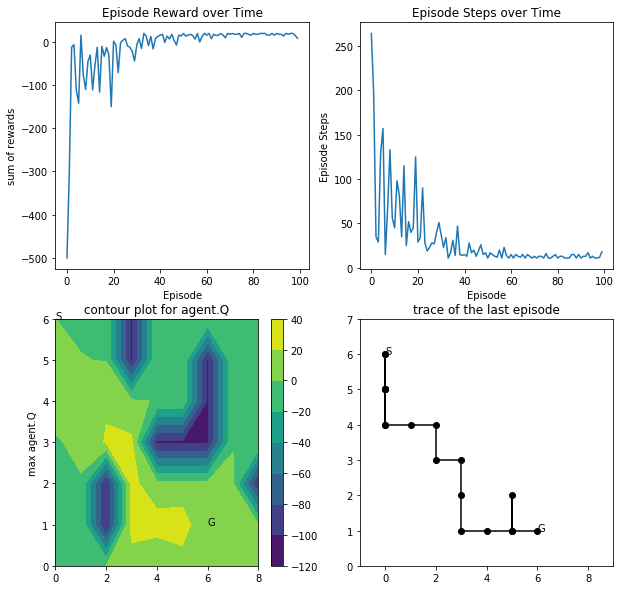

In [11]:
plot_train(agent, rtrace, steps, trace, start)

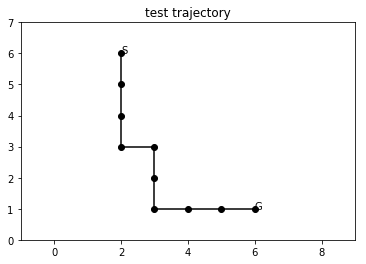

In [12]:
test_start = [0,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

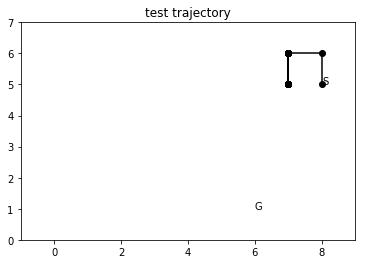

In [13]:
test_start = [1,8]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

## Tests for Parameters

### Test Gamma paremeter

### 1 - Gamma 0.01

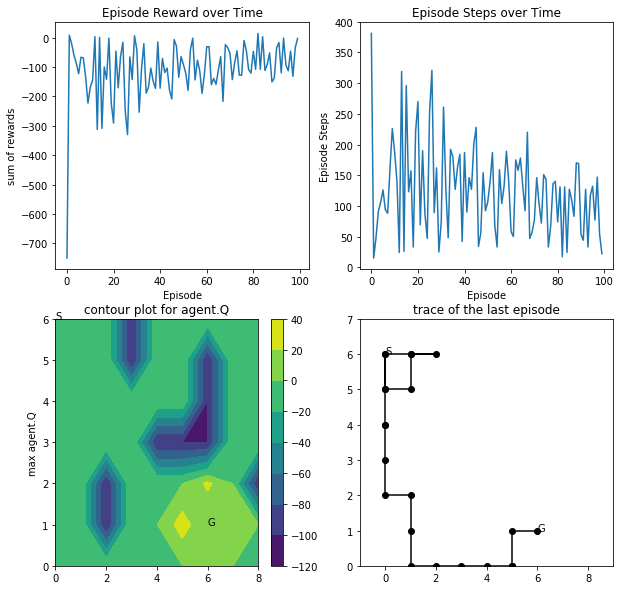

In [14]:
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.01, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace, start)

### 2 - Gamma 0.9

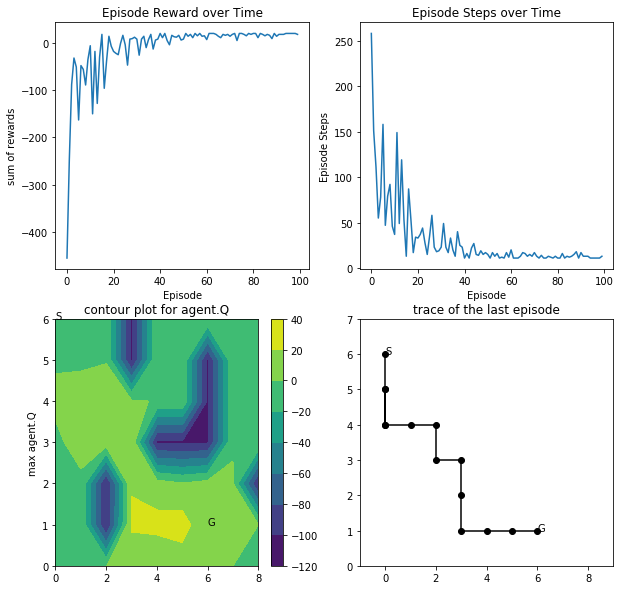

In [15]:
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.9, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace, start)

**Gamma (Discount factor): ** It corresponds to future rewards. If the discount factor is 0 the agent is short sighted and considers only current rewards where as  a factor of 1 will make it strive for a long-term high reward.

In the above plots we can see that a low gamma value of 0.01 makes the agent to just avoid the next wall without thinking about the future reward where as a high gamma value of 0.9 will make the agent to avoid the wall and also move towards the goal.


### Test Alpha paremeter

### 1 - Alpha 0.06

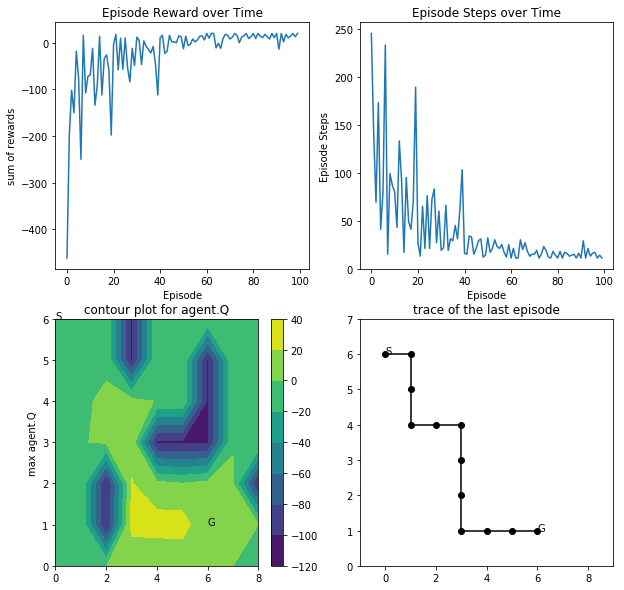

In [16]:
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.06, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace, start)

### 2 - Alpha 0.8

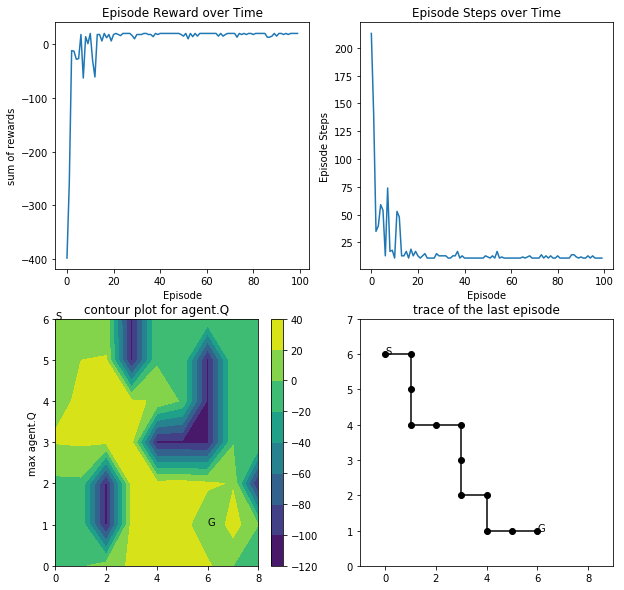

In [17]:
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.8, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace, start)

**Alpha (Learning rate):** It corresponds to the learning rate, higher the learning rate quicker the agent learns about the environment. But if the learning rate is to high the agent might not over learn.

As we can see in the plots the agent takes more time to learn when the alpha value is low (i.e. 0.06), where as it learns quickly when the learning rate is 0.8


### Test Epsilon paremeter

### 1 - Epsilon 0.05

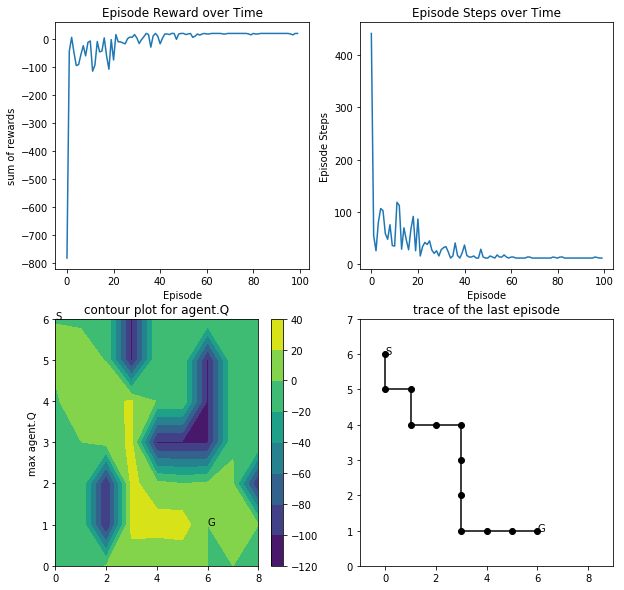

In [18]:
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.05, 
                                   maxiter=100, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace, start)

### 2 - Epsilon 0.8

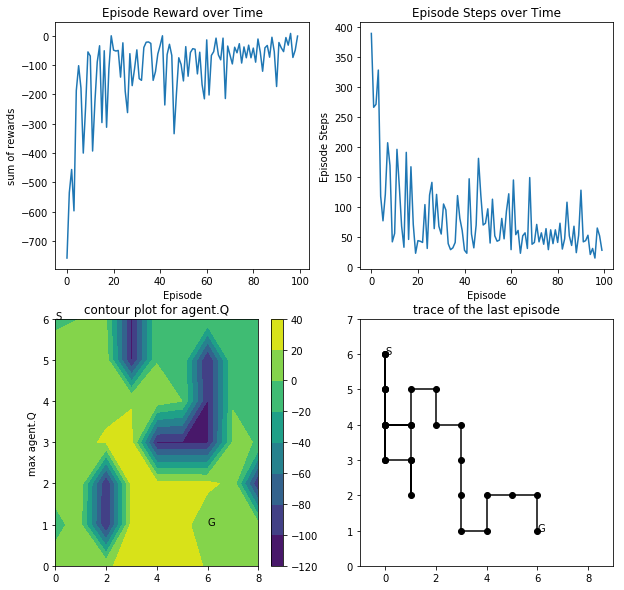

In [19]:
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.8, 
                                   maxiter=100, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace, start)

**Epsilon :** It epsilon make the agent to move randomly to explore the map. It is good to have a higher epsilon value at the beginning to explore the environment and you don't want the value once you have completely explored the environment.
Hence a better way is to use decaying epsilon which we will see For BlackJack environment.


### Training and Testing the BlackJack 


In [20]:
def polt_result_blackJack(average_payouts,agent):
    plot_avg_reward(average_payouts)
    try_plot(agent)

def try_plot(agent):
    agent.show_strategy()
    
def summary(diff,wP, lP, dP):
    print("Your Winning persetage is ", wP)
    print("Your Losing persetage is ", lP)
    print("The Percentage of game being a Draw is ", dP)
    print("You have lost ",diff*-1," more games than the games you Won")
    
def plot_avg_reward(average_payouts):
    plt.plot(average_payouts)           
    plt.xlabel('num_samples')
    plt.ylabel('payout after 1000 rounds')
    plt.show()      
    print ("Average payout after {} rounds is {}".format(num_rounds, sum(average_payouts)/(num_samples)))

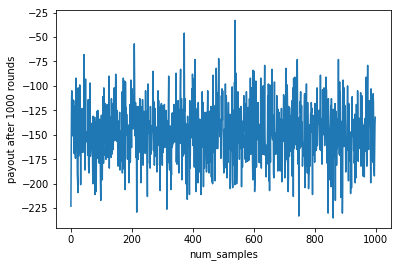

Average payout after 1000 rounds is -147.578
 Player's  |       Dealer's upcard when ace is not usable        |         Dealer's upcard when ace is usable         
   Hand    | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'] | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
         1 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         2 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         3 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         4 | ['S', 'S', 'H', 'S', 'S', 'S', 'S', 'S', 'S', 'S']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         5 | ['S', 'H', 'S', 'H', 'H', 'S', 'H', 'S', 'H', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         6 | ['H', 'H', 'S', 'H', 'H', 'S', 'S', 'H', 'H', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         

In [21]:
envb = BlackjackEnv()
agent = Agent(envb)
num_rounds = 1000
num_samples = 1000
num_episodes_to_train = 0.8* num_rounds
# epsilon=1.0, alpha=0.5, gamma=0.2
average_payouts = agent.train(epsilon=1.0, alpha=0.5, gamma=0.2,num_rounds = num_rounds,num_samples = num_samples,num_episodes_to_train=num_episodes_to_train)
polt_result_blackJack(average_payouts,agent)

## Tests the environment

In [50]:
rew,wP,lP,dP = agent.test(1000)
summary(np.sum(rew) , wP, lP, dP)

Your Winning persetage is  40.9
Your Losing persetage is  51.5
The Percentage of game being a Draw is  7.7
You have lost  106.0  more games than the games you Won


## Tests for Parameters

### Test Epsilon

The epsilon is always 1, because it is a decaying epsilon, so no need to test the parameter

### Test Alpha

Alpha is the learning rate, lets test using 1 higher value and 1 lower value for alpha.
I have reduced the episode and rounds in each episode to 100 for faster execution.

### Alpha - 0.1

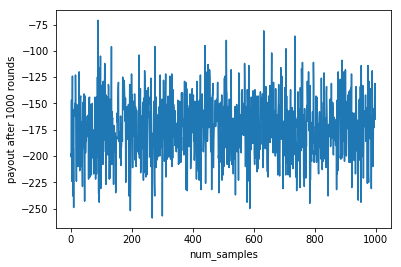

Average payout after 1000 rounds is -173.831
 Player's  |       Dealer's upcard when ace is not usable        |         Dealer's upcard when ace is usable         
   Hand    | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'] | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
         1 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         2 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         3 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         4 | ['S', 'H', 'S', 'H', 'H', 'S', 'S', 'S', 'S', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         5 | ['H', 'S', 'S', 'S', 'H', 'H', 'S', 'H', 'H', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         6 | ['S', 'S', 'S', 'S', 'H', 'S', 'H', 'S', 'H', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         

In [23]:
envb = BlackjackEnv()
agent = Agent(envb)
num_rounds = 1000
num_samples = 1000
num_episodes_to_train = 0.8* num_rounds
# epsilon=1.0, alpha=0.5, gamma=0.2
average_payouts = agent.train(epsilon=1.0, alpha=0.1, gamma=0.1,num_rounds = num_rounds,num_samples = num_samples,num_episodes_to_train=num_episodes_to_train)
polt_result_blackJack(average_payouts,agent)

# Test using Learned values
rew,wP,lP,dP = agent.test(1000)
summary(np.sum(rew) , wP, lP, dP)

### Alpha - 0.9

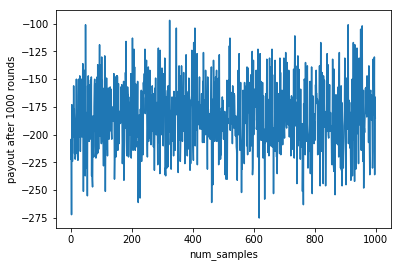

Average payout after 1000 rounds is -183.889
 Player's  |       Dealer's upcard when ace is not usable        |         Dealer's upcard when ace is usable         
   Hand    | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'] | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
         1 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         2 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         3 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         4 | ['S', 'S', 'S', 'H', 'H', 'H', 'H', 'S', 'S', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         5 | ['S', 'H', 'S', 'H', 'S', 'H', 'H', 'H', 'S', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         6 | ['H', 'H', 'S', 'S', 'S', 'S', 'H', 'H', 'H', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         

In [24]:
envb = BlackjackEnv()
agent = Agent(envb)
num_rounds = 1000
num_samples = 1000
num_episodes_to_train = 0.8* num_rounds
# epsilon=1.0, alpha=0.5, gamma=0.2
average_payouts = agent.train(epsilon=1.0, alpha=0.9, gamma=0.1,num_rounds = num_rounds,num_samples = num_samples,num_episodes_to_train=num_episodes_to_train)
polt_result_blackJack(average_payouts,agent)

# Test using Learned values
rew,wP,lP,dP = agent.test(1000)
summary(np.sum(rew) , wP, lP, dP)

By comparing the average payout it is evident that the higher alpha value makes the agent miss important features.
Hence i choose 0.1 for alpha value

### Test - Gamma 

Gamma controls the future visibility of the agent.
Since Blackjack hardly goes beyond 5 rounds a game, a higher value of Gamma will not help the agent.
Hence i choose a lower value for the Gamma.

### Gamma - 0.2

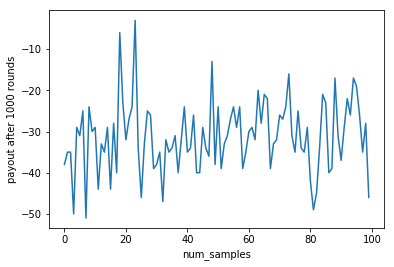

Average payout after 100 rounds is -31.2
 Player's  |       Dealer's upcard when ace is not usable        |         Dealer's upcard when ace is usable         
   Hand    | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'] | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
         1 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         2 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         3 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         4 | ['H', 'S', 'H', 'S', 'H', 'S', 'S', 'S', 'H', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         5 | ['S', 'S', 'H', 'H', 'S', 'H', 'S', 'S', 'H', 'S']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         6 | ['H', 'H', 'H', 'S', 'S', 'H', 'H', 'S', 'H', 'S']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         7 | 

In [25]:
envb = BlackjackEnv()
agent = Agent(envb)
num_rounds = 100
num_samples = 100
num_episodes_to_train = 0.8* num_rounds
# epsilon=1.0, alpha=0.5, gamma=0.2
average_payouts = agent.train(epsilon=1.0, alpha=0.1, gamma=0.2,num_rounds = num_rounds,num_samples = num_samples,num_episodes_to_train=num_episodes_to_train)
polt_result_blackJack(average_payouts,agent)

# Test using Learned values
rew,wP,lP,dP = agent.test(1000)
summary(np.sum(rew) , wP, lP, dP)

### Gamma - 0.9

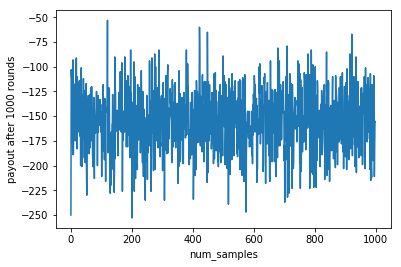

Average payout after 1000 rounds is -154.242
 Player's  |       Dealer's upcard when ace is not usable        |         Dealer's upcard when ace is usable         
   Hand    | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'] | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
         1 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         2 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         3 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         4 | ['H', 'H', 'S', 'S', 'S', 'S', 'H', 'H', 'H', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         5 | ['S', 'H', 'S', 'S', 'H', 'H', 'H', 'S', 'S', 'S']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         6 | ['H', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         

In [26]:
envb = BlackjackEnv()
agent = Agent(envb)
num_rounds = 1000
num_samples = 1000
num_episodes_to_train = 0.8* num_rounds
# epsilon=1.0, alpha=0.5, gamma=0.2
average_payouts = agent.train(epsilon=1.0, alpha=0.1, gamma=0.9,num_rounds = num_rounds,num_samples = num_samples,num_episodes_to_train=num_episodes_to_train)
polt_result_blackJack(average_payouts,agent)

# Test using Learned values
rew,wP,lP,dP = agent.test(1000)
summary(np.sum(rew) , wP, lP, dP)

## Final Results 

Let us combine the selected parameters and run for the final time and see the results. The Parameters that are selected after the above experiments are ** gamma=0.99, alpha=0.1, epsilon=0.07 ** 

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


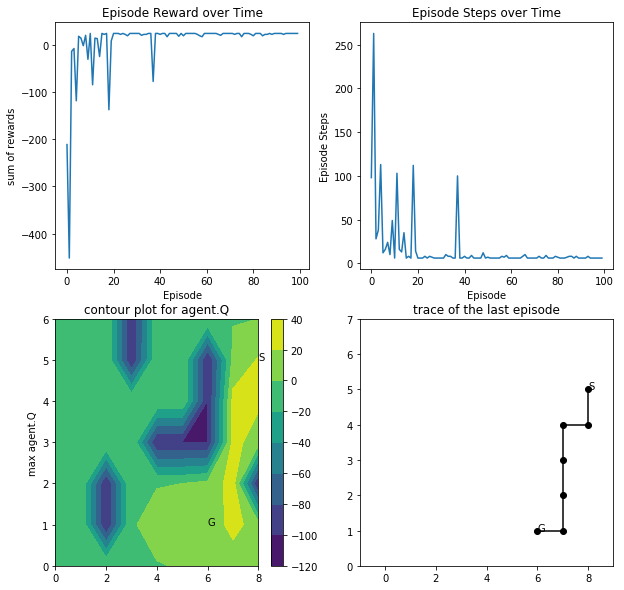

In [27]:
env1 = GridWorld("grid.txt")
env1.print_map()
agent1 = RLAgent(env1)
start = [1,8]
rtrace1, steps1, trace1 = agent1.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.07, 
                                   maxiter=100, 
                                   maxstep=1000)

plot_train(agent1, rtrace1, steps1, trace1, start)

- ** Each 2d matrix below represent the row in a Grid **
- ** Each row in a 2d matrix represent the column in the Grid. **
- ** Each Column in a 2d matrix represent value for each action. ** 


 <font color ="red"> <b> Once we Reach the goal we set the values for each action to zero so that we don't want the agent to take any further actions once it reaches the Goal. </b></font>

In [102]:
print("Final Q Values :")
print(agent1.Q)

[[[ -9.50000000e-01  -5.00849843e-01  -9.50000000e-01  -5.92008225e-01]
  [ -4.98207119e-01  -5.88651135e-01  -9.50000000e-01  -5.16251578e-01]
  [ -4.99785354e-01  -9.50000000e-01  -9.50000000e-01  -5.89600381e-01]
  [            -inf             -inf             -inf             -inf]
  [ -1.89819500e+00  -1.12548145e+00  -1.89938062e+00  -1.14011278e+00]
  [ -1.20719636e+00  -1.19575097e+00  -2.31183547e+00  -1.11684991e+00]
  [ -1.31916075e+00  -1.30642149e+00  -1.89917510e+00  -1.90947045e+00]
  [ -1.43271059e+00  -1.40196477e+00  -1.40439426e+00  -1.38528483e+00]
  [ -1.61642407e+00  -2.39885362e+00  -1.89853366e+00  -1.82689991e-03]]

 [[ -1.37479010e+00  -5.97626773e-01  -5.96358614e-01  -5.07815298e-01]
  [ -5.74300368e-01  -4.99978162e-01  -5.89505361e-01  -5.04804421e-01]
  [ -5.80560839e-01  -1.38476724e+00  -5.07980181e-01  -6.00826706e-01]
  [            -inf             -inf             -inf             -inf]
  [ -9.50000000e-01  -1.00742441e+00  -1.06744914e+00  -1.0000

Let us combine the selected parameters and run for the final time and see the results for BlackJack Agent The Parameters that are selected after the above experiments are ** gamma=0.1, alpha=0.1, epsilon=1 ** 

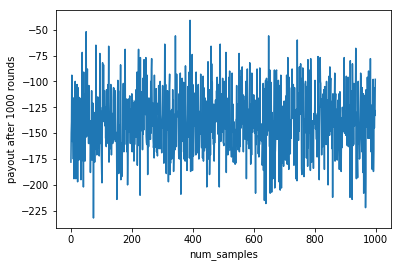

Average payout after 1000 rounds is -138.268
 Player's  |       Dealer's upcard when ace is not usable        |         Dealer's upcard when ace is usable         
   Hand    | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'] | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
         1 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         2 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         3 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         4 | ['S', 'H', 'S', 'H', 'S', 'H', 'H', 'H', 'H', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         5 | ['H', 'H', 'H', 'S', 'S', 'S', 'S', 'H', 'H', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         6 | ['H', 'H', 'H', 'H', 'S', 'H', 'H', 'H', 'H', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         

In [28]:

envb = BlackjackEnv()
agent = Agent(envb)
num_rounds = 1000
num_samples = 1000
num_episodes_to_train = 0.8* num_rounds
# epsilon=1.0, alpha=0.5, gamma=0.2
average_payouts = agent.train(epsilon=1.0, alpha=0.1, gamma=0.1,num_rounds = num_rounds,num_samples = num_samples,num_episodes_to_train=num_episodes_to_train)
polt_result_blackJack(average_payouts,agent)


In [101]:
# Test using Learned values
rew,wP,lP,dP = agent.test(1000)
summary(np.sum(rew) , wP, lP, dP)

Your Winning persetage is  43.3
Your Losing persetage is  50.2
The Percentage of game being a Draw is  6.6000000000000005
You have lost  69.0  more games than the games you Won


### comparison (Maze v/s BlackJack)

So as we can see from the final results we choose the following values for each environment.

- Maze - ** gamma=0.99, alpha=0.1, epsilon=0.07 **
- BlackJack -  ** gamma=0.1, alpha=0.1, epsilon=1 **

Since the future reward is necessary in the Maze problem we choose a higher Gamma value and Lower Gamma value in BlackJack.
Since it is important for agent to learn well in the environments we choose lower value of alpha.
since we used decaying epsilon in blackjack we have to choose epsilon to be 1.



# V. Conclusions

So far the best assignment for the course.
It helped to learn RL in a better way by solving the real world situations.
The challenge that I faced was to update the 3d Q table for Maze problem and to create Q table for the BlackJack problem.


# References

- Stackover Flow
- curious coder - Teaching-a-computer-blackjack-using-reinforcement-learning 
- Open AI Gym

# Extra Credit

- Let us have Blackjack-V0 Tournament in class (Mar 22nd.)!
- Top 4 students will get an extra credit. 
- 2 (or more?) unique training attemps will also get an extra credit. (Sales for it to be considered.) 

## Grading

We will test your notebook with an additional grid.txt file. Please make sure to test in different maze input files. 

points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Maze Problem | 
 | 5| Includes description of maze problem
 | 5| Explains the GridWorld
10 | Blackjack
 | 5| Includes description of maze problem
 | 5| Explains the Backjack-V0 (OpenAI Gym)
25 | Methods | 
 | 5| Review of the SARSA and Q-Learning
 | 5| Choice of TD learning and Reason
 |10| Implementation of the selected approach
 | 5| explanation of the codes
45 | Results 
| 5| Reports the selected parameters for both problems. 
|20| Experimental outputs that show the choice of parameters. How do you choose them? (10 points per each problem)
|10| Output plots (5 for each)
|10| reading and analysis of learning results and plots (5 for each)
5 | Conclusions 
